In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  cross_val_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import bartlett, shapiro
from statsmodels.stats.api import anova_lm
from statsmodels.formula.api import ols
from sklearn.svm import SVC
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.tree as tree


In [2]:
df = pd.read_csv('../data/clean_game_data.csv', index_col=0)
df['Victory'] = df['Victory'].astype(int)


In [3]:
df.head()

,Side,Region,Year,Game ID,Team,Victory,Game Duration,Player,Role,Kills,...,Quadra kills,Penta kills,GD@15,CSD@15,XPD@15,LVLD@15,Damage dealt to turrets,Total heal,Time ccing others,Total damage taken
Column,,,,,,,,,,,,,,,,,,,,,
0,Blue Side,WORLDS,2023,53622,Weibo Gaming,0,30.517,TheShy,TOP,1,...,0,0,-243,-30,-64,0,968,8053,12,27242
1,Blue Side,WORLDS,2023,53622,Weibo Gaming,0,30.517,WeiWei,JUNGLE,3,...,0,0,212,-7,-11,0,0,14875,39,30384
2,Blue Side,WORLDS,2023,53622,Weibo Gaming,0,30.517,xiaohu,MID,1,...,0,0,363,9,511,1,1622,3561,8,14642
3,Blue Side,WORLDS,2023,53622,Weibo Gaming,0,30.517,Crisp,ADC,0,...,0,0,-1002,-45,-580,0,0,3640,7,17807
4,Blue Side,WORLDS,2023,53622,Weibo Gaming,0,30.517,Light,SUPPORT,0,...,0,0,435,15,352,1,379,7932,23,11032


### MID

In [4]:
mid_df = df[df['Role'] == 'MID'].select_dtypes(include='number').drop(columns=['Year', 'Game ID'])

for_calculation_mid_df = mid_df.drop(columns=['Victory'])

scaled_mid_df = deepcopy(for_calculation_mid_df)

scaler = StandardScaler()

scaled_mid_df[:] = scaler.fit_transform(for_calculation_mid_df)


In [5]:
scaled_mid_df.head()

,Game Duration,Kills,Deaths,Assists,KDA,CS,CS in Team's Jungle,CSM,Golds,GPM,...,Quadra kills,Penta kills,GD@15,CSD@15,XPD@15,LVLD@15,Damage dealt to turrets,Total heal,Time ccing others,Total damage taken
Column,,,,,,,,,,,,,,,,,,,,,
2,-0.380480,-0.834957,-0.191860,-1.165178,-0.892983,1.138469,-0.231093,2.565945,-0.122347,0.310677,...,-0.090215,-0.032624,0.419694,0.526600,0.759030,1.460653,-0.525164,-0.005643,-0.711157,-0.248575
7,-0.380480,-0.834957,-0.191860,-0.336495,-0.579064,-0.579580,-0.917596,-0.488768,-0.496417,-0.322077,...,-0.090215,-0.032624,-0.419694,-0.526600,-0.759030,-1.460653,0.071575,-0.261504,-0.490368,-0.674279
2,-0.478429,-0.834957,-0.772245,-1.441405,-0.892983,-0.613267,-1.222708,-0.398924,-1.084093,-1.226012,...,-0.090215,-0.032624,-0.048560,-0.058511,-0.167848,0.000000,-0.866248,0.436185,-0.784753,-0.491660
7,-0.478429,-0.834957,-1.352629,0.215960,0.362693,-0.714329,-0.459928,-0.578613,-0.560257,-0.303999,...,-0.090215,-0.032624,0.048560,0.058511,0.167848,0.000000,-0.512191,0.126558,0.245592,0.594874
2,-1.198277,-1.238759,0.388524,-1.441405,-1.102263,-1.438605,-0.612484,-0.937991,-1.841895,-1.804529,...,-0.090215,-0.032624,-0.094807,-0.058511,-0.216866,0.000000,-1.038372,-0.966467,-0.784753,-0.696934


In [6]:
mid_df.head()

,Victory,Game Duration,Kills,Deaths,Assists,KDA,CS,CS in Team's Jungle,CSM,Golds,...,Quadra kills,Penta kills,GD@15,CSD@15,XPD@15,LVLD@15,Damage dealt to turrets,Total heal,Time ccing others,Total damage taken
Column,,,,,,,,,,,,,,,,,,,,,
2,0,30.517,1,2,1,1.0,350,13,11.5,12727,...,0,0,363,9,511,1,1622,3561,8,14642
7,1,30.517,1,2,4,2.5,248,4,8.1,11643,...,0,0,-363,-9,-511,-1,3508,2752,11,11861
2,0,29.950,1,1,0,1.0,246,0,8.2,9940,...,0,0,-42,-1,-113,0,544,4958,7,13054
7,1,29.950,1,0,6,7.0,240,10,8.0,11458,...,0,0,42,1,113,0,1663,3979,21,20152
2,0,25.783,0,3,0,0.0,197,8,7.6,7744,...,0,0,-82,-1,-146,0,0,523,7,11713


In [7]:
pca3_mid = PCA(n_components=3)

pca3_df_mid = pca3_mid.fit_transform(scaled_mid_df)


D:\anaconda3\envs\master\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


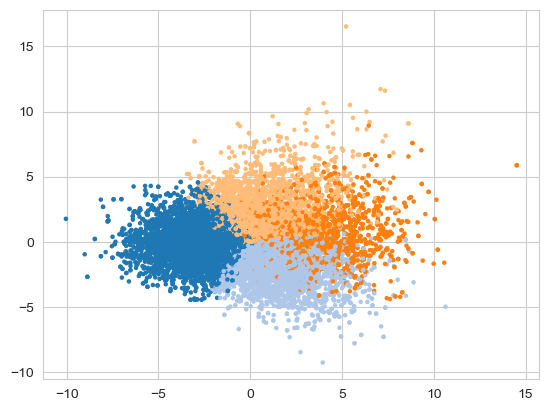

In [8]:
tab20 = plt.get_cmap('tab20')
n_clusters = 4

km = KMeans(n_clusters)
pred = km.fit_predict(pca3_df_mid)
plt.scatter(pca3_df_mid[:,0],pca3_df_mid[:,1],color = [tab20.colors[pred[i] % 20] for i in range(len(pca3_df_mid))],s=5)

In [9]:
from sklearn.metrics import davies_bouldin_score
print(davies_bouldin_score(pca3_df_mid, pred))

1.19781811687741


In [10]:
mid_df['Cluster'] = pred
scaled_mid_df['Cluster'] = pred

In [11]:
mid_df

,Victory,Game Duration,Kills,Deaths,Assists,KDA,CS,CS in Team's Jungle,CSM,Golds,...,Penta kills,GD@15,CSD@15,XPD@15,LVLD@15,Damage dealt to turrets,Total heal,Time ccing others,Total damage taken,Cluster
Column,,,,,,,,,,,,,,,,,,,,,
2,0,30.517,1,2,1,1.0,350,13,11.5,12727,...,0,363,9,511,1,1622,3561,8,14642,3
7,1,30.517,1,2,4,2.5,248,4,8.1,11643,...,0,-363,-9,-511,-1,3508,2752,11,11861,0
2,0,29.950,1,1,0,1.0,246,0,8.2,9940,...,0,-42,-1,-113,0,544,4958,7,13054,0
7,1,29.950,1,0,6,7.0,240,10,8.0,11458,...,0,42,1,113,0,1663,3979,21,20152,0
2,0,25.783,0,3,0,0.0,197,8,7.6,7744,...,0,-82,-1,-146,0,0,523,7,11713,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,0,50.817,4,3,4,2.7,431,46,8.5,19394,...,0,-335,2,78,0,2393,11541,54,29787,2
2,1,34.317,5,1,7,12.0,260,8,7.6,13172,...,0,-48,2,97,1,4762,3412,11,12974,3
7,0,34.317,2,8,2,0.5,239,7,7.0,11247,...,0,48,-2,-97,-1,102,6409,8,30352,0


<Axes: xlabel='Cluster', ylabel='KDA'>

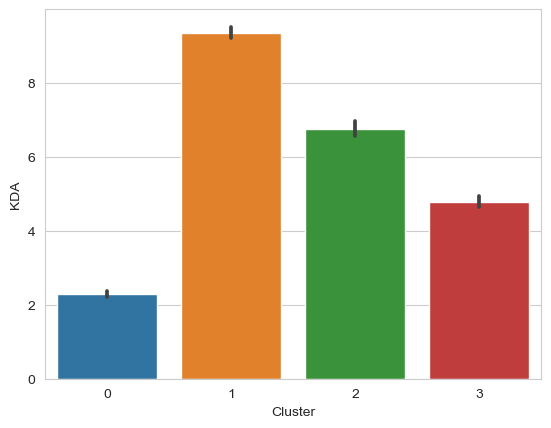

In [12]:
sns.barplot(mid_df, x='Cluster', y='KDA')

<Axes: xlabel='Cluster', ylabel='Assists'>

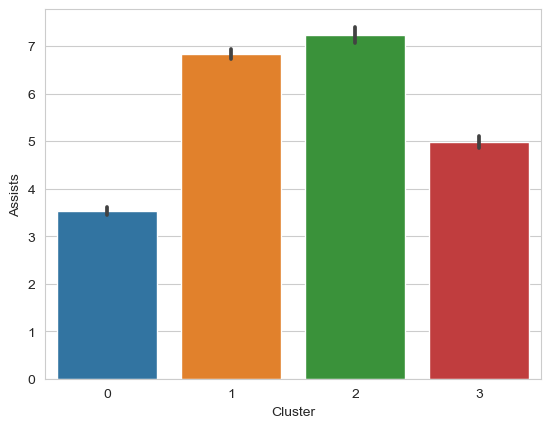

In [13]:
sns.barplot(mid_df, x='Cluster', y='Assists')

In [14]:
#win rate for clusters

def get_rank_cluster(df_clusters, n_clusters):
    win_rate = []
    for cluster in range(n_clusters):
        df_cluster = df_clusters[mid_df['Cluster'] == cluster]['Victory']
        win_rate.append(df_cluster.value_counts()[1] / len(df_cluster))
    
    index_descend = np.argsort(win_rate)[::-1]
    
    dict_rank_descend = {cluster : rank for rank, cluster in zip(range(n_clusters), index_descend)}
    
    return win_rate, dict_rank_descend

In [15]:
win_rate, dict_rank_descend = get_rank_cluster(mid_df, n_clusters)
win_rate = sorted(win_rate)[::-1]
for i in range(n_clusters):
    print(f'Cluster {i} :')
    print(f'win_rate {win_rate[dict_rank_descend[i]]} \n')
    


Cluster 0 :
win_rate 0.20608899297423888 

Cluster 1 :
win_rate 0.8650580875781948 

Cluster 2 :
win_rate 0.65 

Cluster 3 :
win_rate 0.4972894831947958 


In [16]:
array_data = mid_df.drop(columns=['Cluster']).to_numpy()
array_clusters = mid_df['Cluster'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(array_data, array_clusters, test_size=0.2, random_state=42)

In [17]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [18]:
decision_tree.decision_path(x_train)

<10534x1643 sparse matrix of type '<class 'numpy.int64'>'
	with 157306 stored elements in Compressed Sparse Row format>

In [19]:
from IPython.display import Image
import os

figure_out = '../output/decision_tree_mid'

dot_file = tree.export_graphviz(decision_tree, out_file=f'{figure_out}.dot',
                                feature_names=mid_df.drop(columns=['Cluster']).columns,
                                class_names=[f'Cluster {i}' for i in range(n_clusters)], filled=True)

os.system(f"dot -T png {figure_out}.dot -o {figure_out}.png")

Image(filename=figure_out+'.png')

In [20]:
print(cross_val_score(tree.DecisionTreeClassifier(), array_data, array_clusters, cv=5, n_jobs=-1).mean())

0.7873642492735017


In [21]:
print(cross_val_score(SVC(), array_data, array_clusters, cv=5, n_jobs=-1).mean())

0.719093244697218


In [22]:
print(cross_val_score(RandomForestClassifier(), array_data, array_clusters, cv=5, n_jobs=-1).mean())

0.8995289043536839


### ANOVA processing

In [31]:
mid_df_pure_data = mid_df.drop(columns=['Cluster', 'Victory', 'LVLD@15'])

for column in mid_df_pure_data.columns:
    column_by_clusters = []
    for i in range(n_clusters):
        column_by_clusters.append(mid_df_pure_data[mid_df['Cluster'] == i][column].to_numpy())

    bartlett_p_value = bartlett(*column_by_clusters).pvalue

    if not(bartlett_p_value >= 0.05 or np.isclose(bartlett_p_value, 0.05, atol=0.002)):
        print('p value of bartlett less than 0.05, ANOVA not applicable')
        continue

    shapiro_p_values = shapiro(df[column]).pvalue

    if not(bartlett_p_value >= 0.05 or np.isclose(bartlett_p_value, 0.05, atol=0.002)):
        print('p value of shapiro less than 0.05, ANOVA not applicable')
        continue
    
    formula = f"{column} ~ C(Cluster)"
    
    anova_result = ols(formula=formula, data=mid_df).fit()
    print(anova_lm(anova_result))

p value of bartlett less than 0.05, ANOVA not applicable
p value of bartlett less than 0.05, ANOVA not applicable
p value of bartlett less than 0.05, ANOVA not applicable
p value of bartlett less than 0.05, ANOVA not applicable
p value of bartlett less than 0.05, ANOVA not applicable
p value of bartlett less than 0.05, ANOVA not applicable
p value of bartlett less than 0.05, ANOVA not applicable
p value of bartlett less than 0.05, ANOVA not applicable
p value of bartlett less than 0.05, ANOVA not applicable
p value of bartlett less than 0.05, ANOVA not applicable
p value of bartlett less than 0.05, ANOVA not applicable
p value of bartlett less than 0.05, ANOVA not applicable
p value of bartlett less than 0.05, ANOVA not applicable
p value of bartlett less than 0.05, ANOVA not applicable
p value of bartlett less than 0.05, ANOVA not applicable
p value of bartlett less than 0.05, ANOVA not applicable
p value of bartlett less than 0.05, ANOVA not applicable
p value of bartlett less than 0

D:\anaconda3\envs\master\lib\site-packages\scipy\stats\_morestats.py:2901: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [ ]:
print(f"min duration : {min(mid_df['Game Duration'])}")
print(f"max duration : {max(mid_df['Game Duration'])}")

In [ ]:
time_segment = [i for i in range(15, 71, 5)]

In [ ]:
for i in time_segment:
    